# Make Spice Anomaly Maps

Serves issue #6
Use the local linearization of the equation of state and the mean temperature and salinity to estimate spice anomalies.

Will require some interpolation routine that takes from depth to density space and back.



In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xarray as xr 

import matplotlib.pylab as plt
from matplotlib.colors import BoundaryNorm
import glidertools as gt


from cmocean import cm as cmo

import gsw

In [3]:
plt.style.use('seaborn-colorblind')
plt.rcParams['font.size'] = 12

In [4]:
data_dir = '/Users/dhruvbalwada/OneDrive/sogos_data'
data_659 = data_dir+'/data/interim/gliders/sg659/CTD_659.nc'
data_660 = data_dir+'/data/interim/gliders/sg660/CTD_660.nc'

In [5]:
ds_659 = xr.load_dataset(data_659)
ds_660 = xr.load_dataset(data_660)

In [126]:
ds_659

<xarray.Dataset>
Dimensions:      (ctd_data_point: 1363330)
Dimensions without coordinates: ctd_data_point
Data variables:
    pressure     (ctd_data_point) float64 nan nan nan nan ... 1.165 1.037 nan
    latitude     (ctd_data_point) float64 -51.51 -51.51 -51.51 ... -51.7 -51.7
    longitude    (ctd_data_point) float64 30.03 30.03 30.03 ... 38.99 38.99
    temperature  (ctd_data_point) float64 3.564 3.561 3.56 ... 1.812 1.811 1.814
    salinity     (ctd_data_point) float64 nan nan nan nan ... 33.89 33.89 nan
    dives        (ctd_data_point) float64 1.0 1.0 1.0 1.0 ... 462.5 462.5 462.5
    time         (ctd_data_point) datetime64[ns] 2019-04-30T13:20:51.23000345...
    potdens      (ctd_data_point) float64 nan nan nan ... 1.027e+03 nan

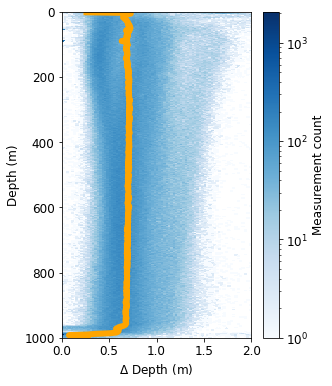

In [6]:
ax = gt.plot.bin_size(ds_660.pressure , 
                      bins=[np.linspace(0,10,401),np.linspace(0,1000,500)], cmap='Blues')
ax.set_xlim(0, 2)
line = ax.get_children()[1]
line.set_linewidth(6)
line.set_color('orange')

legend = ax.get_children()[-2]
legend.set_visible(False)

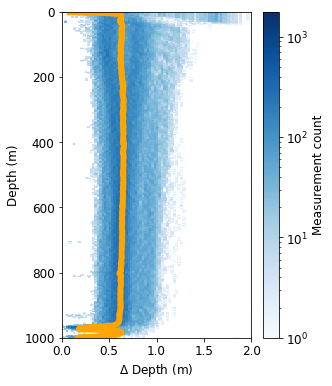

In [7]:
ax = gt.plot.bin_size(ds_659.pressure , 
                      bins=[np.linspace(0,10,401),np.linspace(0,1000,500)], cmap='Blues')
ax.set_xlim(0, 2)
line = ax.get_children()[1]
line.set_linewidth(6)
line.set_color('orange')

legend = ax.get_children()[-2]
legend.set_visible(False)

In [ ]:
ds_659['potdens'] = gt.physics.potential_density(ds_659.salinity, ds_659.temperature, 
                                   ds_659.pressure, ds_659.latitude, 
                                   ds_659.longitude)

In [83]:
ds_660['potdens'] = gt.physics.potential_density(ds_660.salinity, ds_660.temperature, 
                                   ds_660.pressure, ds_660.latitude, 
                                   ds_660.longitude)

In [76]:
temp_grided_659 = gt.grid_data(ds_659.dives, ds_659.pressure, ds_659.temperature)
salt_grided_659 = gt.grid_data(ds_659.dives, ds_659.pressure, ds_659.salinity)
dens_grided_659 = gt.grid_data(ds_659.dives, ds_659.pressure, ds_659.potdens)

Mean bin size = 0.95
Mean depth binned (50 m) vertical sampling frequency = 0.63
Mean bin size = 0.95
Mean depth binned (50 m) vertical sampling frequency = 0.63
Mean bin size = 0.95
Mean depth binned (50 m) vertical sampling frequency = 0.63


In [84]:
temp_grided_660 = gt.grid_data(ds_660.dives, ds_660.pressure, ds_660.temperature)
salt_grided_660 = gt.grid_data(ds_660.dives, ds_660.pressure, ds_660.salinity)
dens_grided_660 = gt.grid_data(ds_660.dives, ds_660.pressure, ds_660.potdens)

Mean bin size = 0.95
Mean depth binned (50 m) vertical sampling frequency = 0.69
Mean bin size = 0.95
Mean depth binned (50 m) vertical sampling frequency = 0.69
Mean bin size = 0.95
Mean depth binned (50 m) vertical sampling frequency = 0.69


Things work qualitatively well when working with the full data set using GT's inbuilt plotting function. 
I am not sure if I trust it completely, so will re-evaluate. 

There are a large number of points to plot (297635). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Temp Data 659')

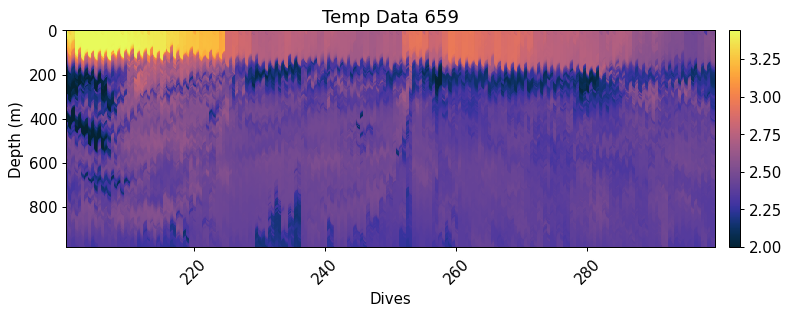

In [18]:
gt.plot.scatter(ds_659.dives.where(np.logical_and(ds_659.dives<300, ds_659.dives>200), drop=True),
        ds_659.pressure.where(np.logical_and(ds_659.dives<300, ds_659.dives>200), drop=True),
        ds_659.temperature.where(np.logical_and(ds_659.dives<300, ds_659.dives>200), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')

There are a large number of points to plot (331294). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Temp Data 659')

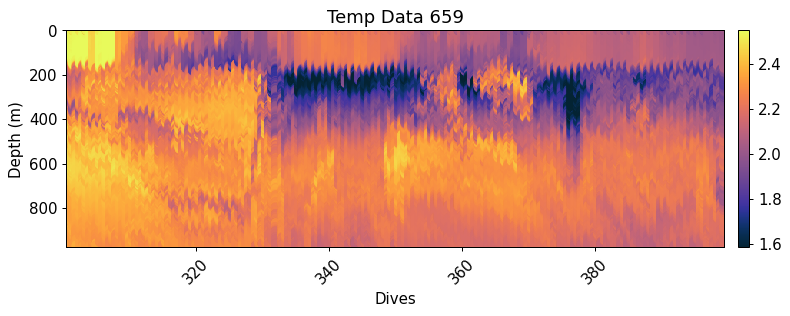

In [55]:
gt.plot.scatter(ds_659.dives.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.pressure.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.temperature.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 659')

There are a large number of points to plot (331381). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Salt Data 659')

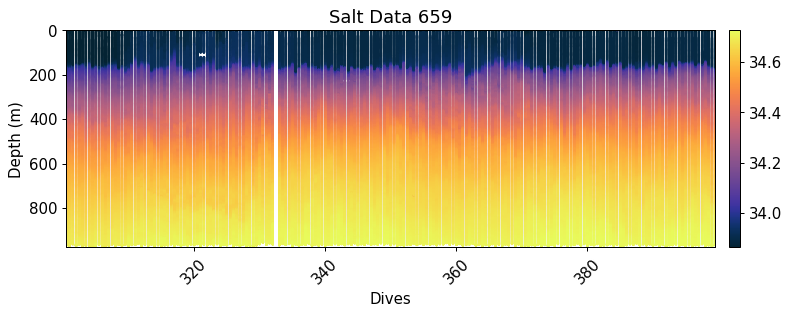

In [123]:
gt.plot.scatter(ds_659.dives.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.pressure.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.salinity.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        cmap=cmo.thermal, robust=True, s=.8)
plt.title('Salt Data 659')

There are a large number of points to plot (331381). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Salt Data 659')

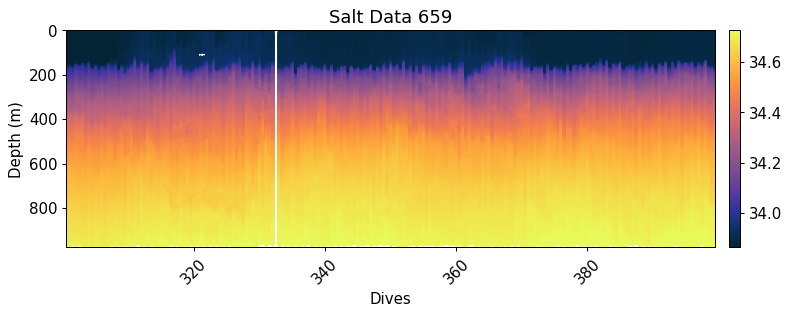

In [122]:
gt.plot.scatter(ds_659.dives.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.pressure.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.salinity.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        cmap=cmo.thermal, robust=True, s=2.5)
plt.title('Salt Data 659')

There are a large number of points to plot (331224). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Dens Data 659')

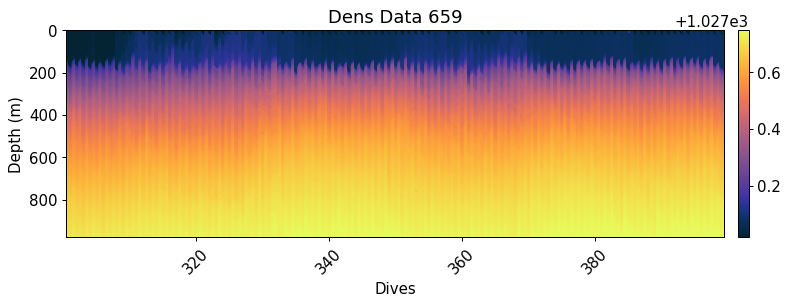

In [75]:
gt.plot.scatter(ds_659.dives.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.pressure.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        ds_659.potdens.where(np.logical_and(ds_659.dives<400, ds_659.dives>300), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Dens Data 659')

There are a large number of points to plot (275710). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Temp Data 660')

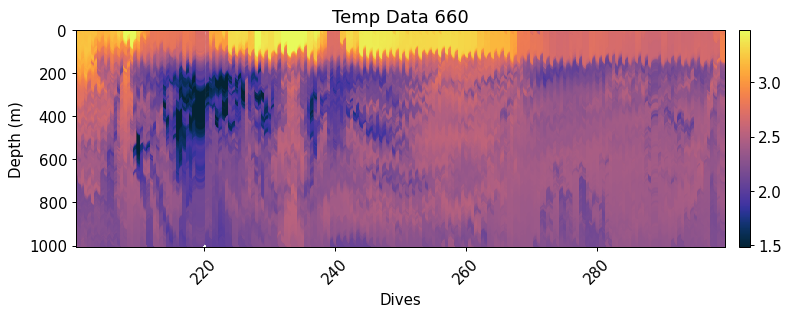

In [57]:
gt.plot.scatter(ds_660.dives.where(np.logical_and(ds_660.dives<300, ds_660.dives>200), drop=True),
        ds_660.pressure.where(np.logical_and(ds_660.dives<300, ds_660.dives>200), drop=True),
        ds_660.temperature.where(np.logical_and(ds_660.dives<300, ds_660.dives>200), drop=True),
        cmap=cmo.thermal, robust=True)
plt.title('Temp Data 660')

There are a large number of points to plot (292675). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Temp Data 660')

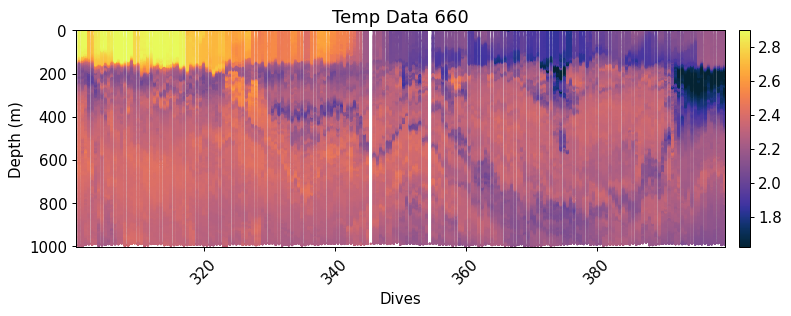

In [119]:
gt.plot.scatter(ds_660.dives.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.pressure.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.temperature.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        cmap=cmo.thermal, robust=True, s=1)
plt.title('Temp Data 660')

There are a large number of points to plot (292675). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(0.5, 1.0, 'Temp Data 660')

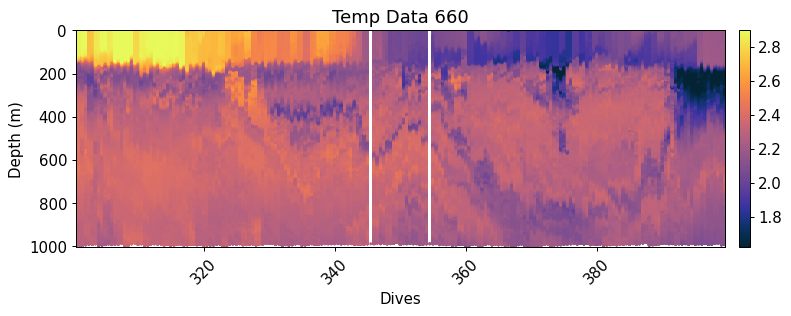

In [120]:
gt.plot.scatter(ds_660.dives.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.pressure.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.temperature.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        cmap=cmo.thermal, robust=True, s=2)
plt.title('Temp Data 660')

There are a large number of points to plot (278484). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(63.75, 0.5, 'Density')

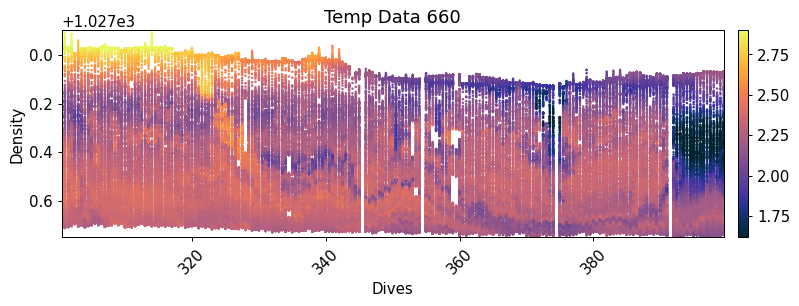

In [124]:
gt.plot.scatter(ds_660.dives.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.potdens.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.temperature.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        cmap=cmo.thermal, robust=True, s=1)
plt.title('Temp Data 660')
plt.ylabel('Density')

There are a large number of points to plot (278484). This will take a while to plot.
Type "y" to continue or "n" to cancel.
 y


Text(63.75, 0.5, 'Density')

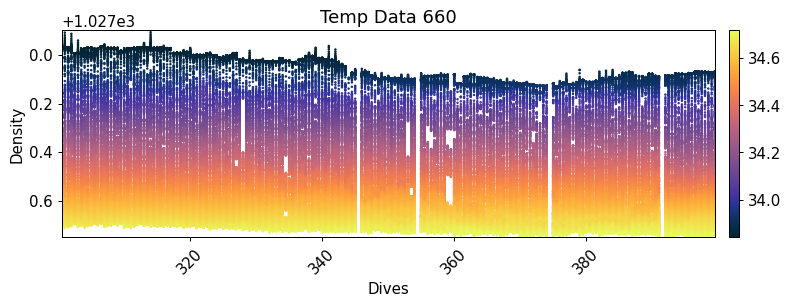

In [125]:
gt.plot.scatter(ds_660.dives.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.potdens.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        ds_660.salinity.where(np.logical_and(ds_660.dives<400, ds_660.dives>300), drop=True),
        cmap=cmo.thermal, robust=True, s=1)
plt.title('Temp Data 660')
plt.ylabel('Density')

In [19]:
profile1 = ds_659.where(ds_659.dives==300, drop=True)
profile2 = ds_659.where(ds_659.dives==300.5, drop=True)

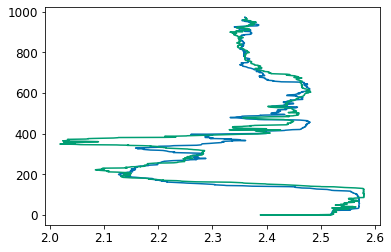

In [21]:
plt.plot( profile1.temperature , profile1.pressure)
plt.plot( profile2.temperature , profile2.pressure)

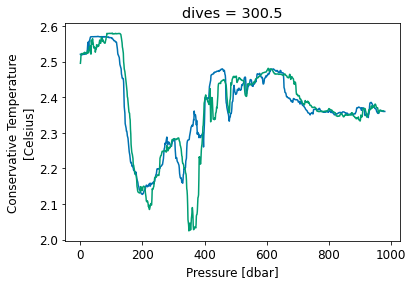

In [24]:
temp_grided_659.sel(dives=300).plot()
temp_grided_659.sel(dives=300.5).plot()

In [28]:
n = np.arange(np.min(np.floor(temp_grided_659.dives)),
                np.max(np.floor(temp_grided_659.dives)))

In [34]:
len(temp_grided_659.pressure)
len(n)

461

In [85]:
tdiff_659 = np.nan*np.ones((len(temp_grided_659.pressure), len(n)))
sdiff_659 = np.nan*np.ones((len(temp_grided_659.pressure), len(n)))
rhodiff_659 = np.nan*np.ones((len(temp_grided_659.pressure), len(n)))
for i in n: 
    try: 
        tdiff_659[:,int(i)] =  (temp_grided_659.sel(dives=i) -  temp_grided_659.sel(dives=i+0.5)).values
        sdiff_659[:,int(i)] =  (salt_grided_659.sel(dives=i) -  salt_grided_659.sel(dives=i+0.5)).values
        rhodiff_659[:,int(i)] =  (dens_grided_659.sel(dives=i) -  dens_grided_659.sel(dives=i+0.5)).values
    except:
        print("missing"+str(i))

missing96.0
missing461.0


In [86]:
tdiff_660 = np.nan*np.ones((len(temp_grided_660.pressure), len(n)))
sdiff_660 = np.nan*np.ones((len(temp_grided_660.pressure), len(n)))
rhodiff_660 = np.nan*np.ones((len(temp_grided_660.pressure), len(n)))
for i in n: 
    try: 
        tdiff_660[:,int(i)] =  (temp_grided_660.sel(dives=i) -  temp_grided_660.sel(dives=i+0.5)).values
        sdiff_660[:,int(i)] =  (salt_grided_660.sel(dives=i) -  salt_grided_660.sel(dives=i+0.5)).values
        rhodiff_660[:,int(i)] =  (dens_grided_660.sel(dives=i) -  dens_grided_660.sel(dives=i+0.5)).values
    except:
        print("missing"+str(i))

missing6.0
missing15.0
missing32.0
missing220.0
missing289.0
missing400.0
missing461.0


In [60]:
from scipy import stats

Text(0.5, 0.98, '659')

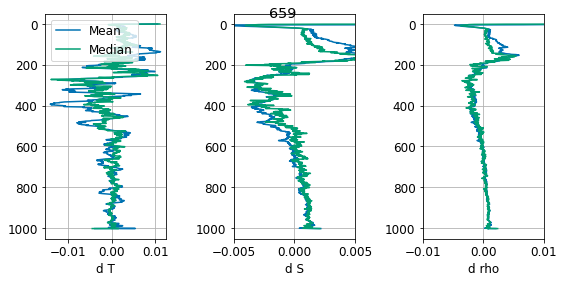

In [104]:
plt.figure(figsize=(8,4))
plt.subplot(131)
plt.plot(np.nanmean(tdiff_659,axis=1),temp_grided_659.pressure, label='Mean')
plt.plot(np.nanmedian(tdiff_659,axis=1),temp_grided_659.pressure, label='Median')
plt.grid()
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('d T')

plt.subplot(132)
plt.plot(np.nanmean(sdiff_659,axis=1),temp_grided_659.pressure, label='Mean')
plt.plot(np.nanmedian(sdiff_659,axis=1),temp_grided_659.pressure, label='Median')
plt.grid()
plt.xlim([-0.005,0.005])
plt.gca().invert_yaxis()
plt.xlabel('d S')

plt.subplot(133)
plt.plot(np.nanmean(rhodiff_659,axis=1),temp_grided_659.pressure, label='Mean')
plt.plot(np.nanmedian(rhodiff_659,axis=1),temp_grided_659.pressure, label='Median')
plt.grid()
plt.xlim([-0.01,0.01])
plt.gca().invert_yaxis()
plt.xlabel('d rho')
plt.tight_layout()

plt.suptitle('659')

Text(0.5, 0.98, '660')

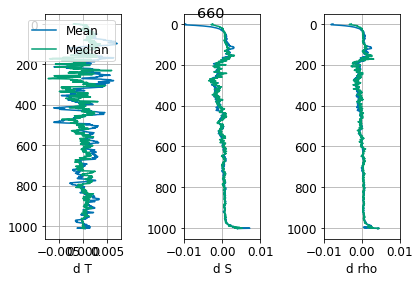

In [97]:
plt.subplot(131)
plt.plot(np.nanmean(tdiff_660,axis=1),temp_grided_660.pressure, label='Mean')
plt.plot(np.nanmedian(tdiff_660,axis=1),temp_grided_660.pressure, label='Median')
plt.grid()
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel('d T')

plt.subplot(132)
plt.plot(np.nanmean(sdiff_660,axis=1),temp_grided_660.pressure, label='Mean')
plt.plot(np.nanmedian(sdiff_660,axis=1),temp_grided_660.pressure, label='Median')
plt.grid()
plt.xlim([-0.01,0.01])
plt.gca().invert_yaxis()
plt.xlabel('d S')

plt.subplot(133)
plt.plot(np.nanmean(rhodiff_660,axis=1),temp_grided_660.pressure, label='Mean')
plt.plot(np.nanmedian(rhodiff_660,axis=1),temp_grided_660.pressure, label='Median')
plt.grid()
plt.xlim([-0.01,0.01])
plt.gca().invert_yaxis()
plt.xlabel('d rho')
plt.tight_layout()
plt.suptitle('660')

In [101]:
0.004/0.7*100


0.5714285714285715

(-0.02, 0.02)

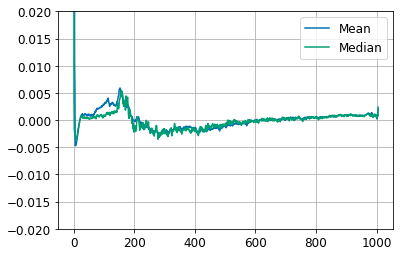

In [81]:
plt.plot(np.nanmean(rhodiff,axis=1), label='Mean')
plt.plot(np.nanmedian(rhodiff,axis=1), label='Median')
plt.grid()
plt.legend()
plt.ylim([-0.02,0.02])

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.99175792, -0.76749911, -0.5432403 , -0.31898149, -0.09472269,
         0.12953612,  0.35379493,  0.57805373,  0.80231254,  1.02657135,
         1.25083015]),
 <a list of 461 BarContainer objects>)

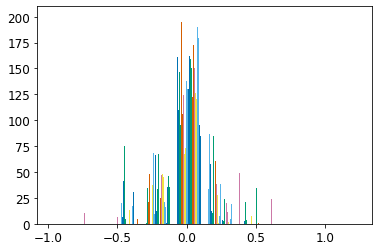

In [54]:
plt.hist(tdiff[100:300,:])

In [39]:
(temp_grided_659.sel(dives=i) -  temp_grided_659.sel(dives=i+0.5)).values.shape

(1099,)

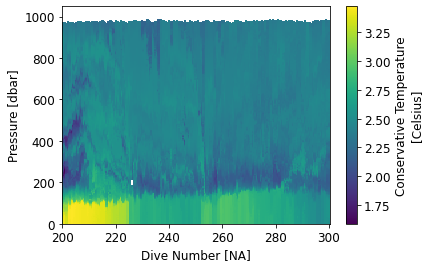

In [26]:
temp_grided_659.sel(dives=slice(200,300)).plot()

In [12]:
profile = ds_659.where(ds_659.dives==300, drop=True)

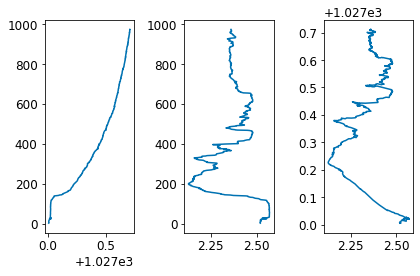

In [14]:
plt.subplot(131)
plt.plot(profile.potdens, profile.pressure )

plt.subplot(132)
plt.plot( profile.temperature, profile.pressure)

plt.subplot(133)
plt.plot(profile.temperature, profile.potdens)

plt.tight_layout()

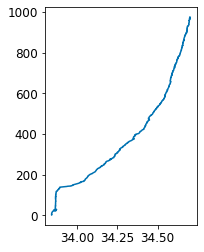

In [105]:
plt.subplot(121)
plt.plot( profile.salinity, profile.pressure )


In [115]:
(profile.salinity.min()- profile.salinity.max())

<xarray.DataArray 'salinity' ()>
array(-0.8562853)

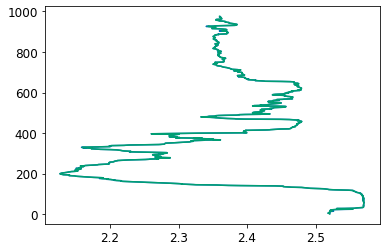

In [19]:
plt.subplot(121)
plt.plot( profile.temperature, profile.pressure )
plt.plot( temp_grid, temp_grid.pressure )



In [17]:
temp_depth = gt.grid_data(profile.dives, profile.pressure, profile.temperature)

Mean bin size = 1.06
Mean depth binned (50 m) vertical sampling frequency = 0.89


In [35]:
temp_dens = gt.grid_data(profile.dives, dens, profile.temperature, 
                         bins = np.linspace(dens.min().values, dens.max().values,101))

Mean bin size = 0.01
Mean depth binned (50 m) vertical sampling frequency = 0.00


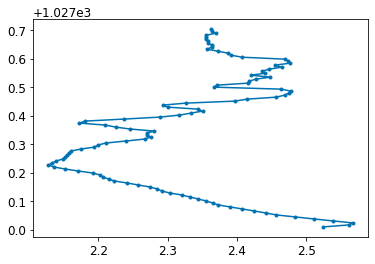

In [37]:
plt.plot(temp_dens, temp_dens.potential_density, '.-')

In [ ]:
 = gt.grid_data(ds_659.dives, dens, profile.temperature, 
                         bins = np.linspace(dens.min().values, dens.max().values,201))